In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel 
import pandas as pd

## Spherical core 

*BlockCopolymerMicelle*

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_BlockCopolymerMicelle.c

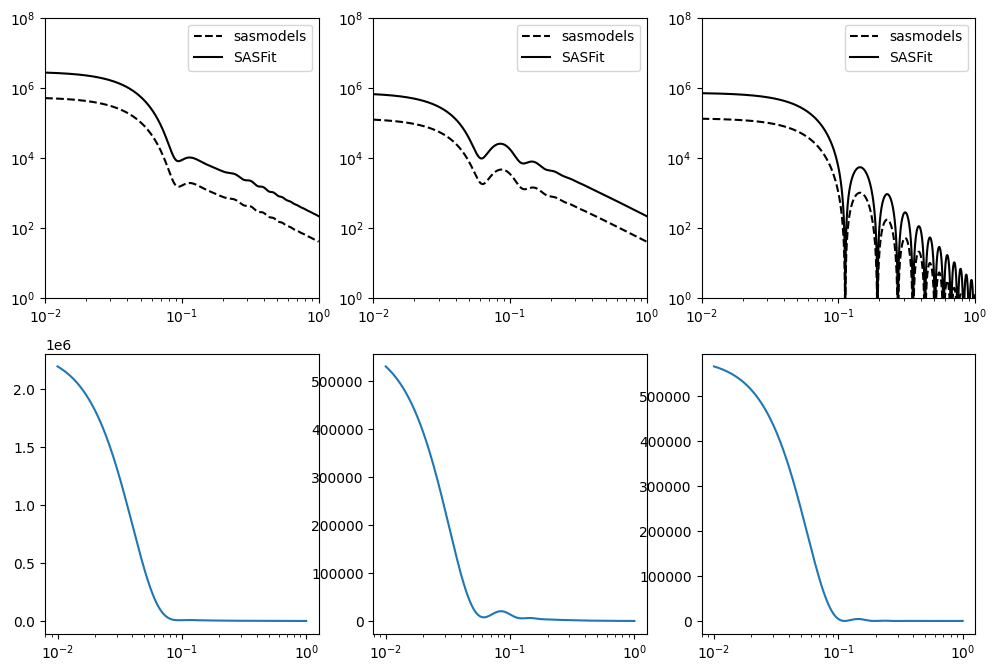

CPU times: user 1.22 s, sys: 110 ms, total: 1.34 s
Wall time: 813 ms


In [12]:
%%time
files = ["01_sph_homogenous", "01_sph_shell", "01_sph_core"]
model = load_model("../models/spherical_micelle.py")
q_sasmodels = np.logspace(-2, 0, 1001)
kernel = model.make_kernel([q_sasmodels])

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
# contrasts in the order of solvent, core, corona
contrasts = [[1,2,2], # homogenous
[1,1,2], # corona/shell
[1,2,1] # core
] 
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    sphere_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    Iq_sasmodels = call_kernel(kernel, sphere_params)
    axs[0,i].loglog(q_sasmodels, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    data_sasfit = pd.read_csv("./SASFit/version2/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q_sasfit = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*10
    axs[0,i].loglog(q_sasfit, Iq_sasfit, color='k', label="SASFit")

    axs[0,i].set_ylim([1e0, 1e8])
    axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].legend()

    axs[1,i].plot(q_sasfit, np.abs(Iq_sasfit-Iq_sasmodels))
    axs[1,i].set_xscale('log')
plt.show()

## Cylinder

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

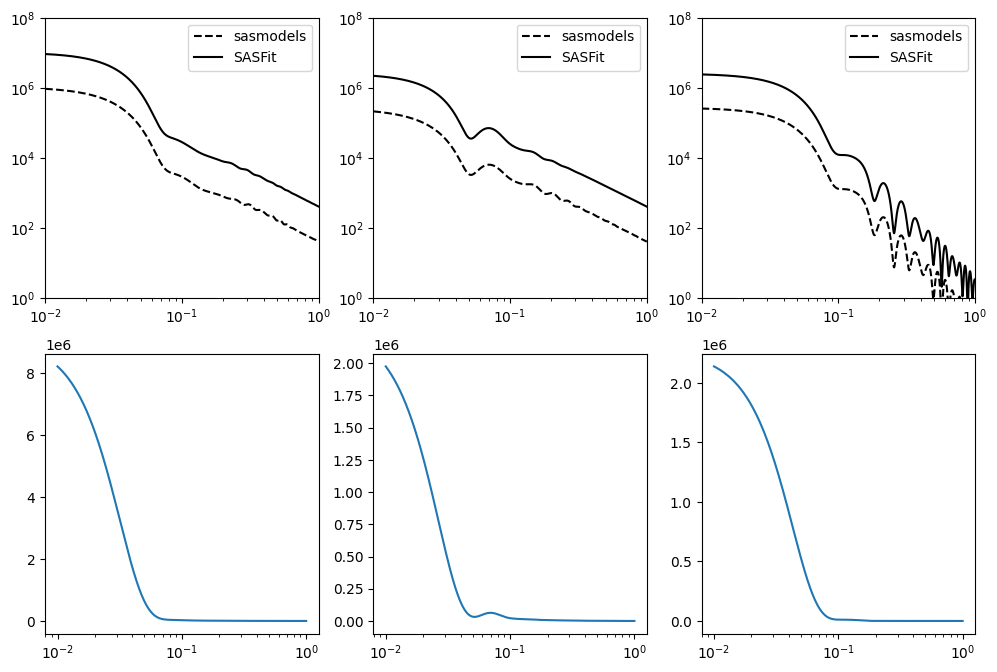

CPU times: user 1.29 s, sys: 102 ms, total: 1.39 s
Wall time: 863 ms


In [18]:
%%time

files = ["02_cyl_homogenous", "02_cyl_shell", "02_cyl_core"]
model = load_model("../models/cylindrical_micelle.py")
q_sasmodels = np.logspace(-2, 0, 1001)
kernel = model.make_kernel([q_sasmodels])

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
contrasts = [[1,2,2], [1,1,2], [1,2,1]]
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'length_core' : 100.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q_sasmodels, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    data_sasfit = pd.read_csv("./SASFit/version2/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q_sasfit = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*10
    axs[0,i].loglog(q_sasfit, Iq_sasfit, color='k', label="SASFit")

    axs[0,i].set_ylim([1e0, 1e8])
    axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].legend()
    axs[1,i].plot(q_sasfit, np.abs(Iq_sasfit-Iq_sasmodels))
    axs[1,i].set_xscale('log')
plt.show()

## Long cylinder or Rod 

*ROD+Chains(RW)_Rc* 

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_Rod_RWbrush.c

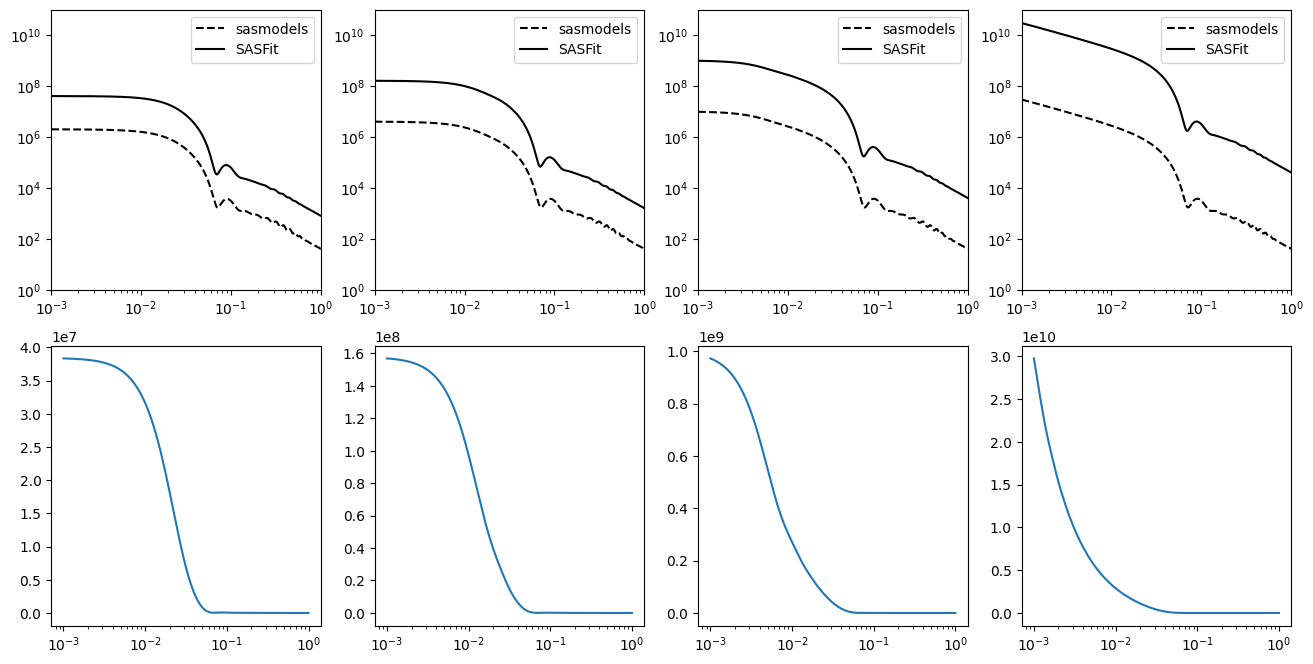

CPU times: user 1.62 s, sys: 104 ms, total: 1.72 s
Wall time: 1.2 s


In [20]:
%%time

files = ["03_rod_20nm", "03_rod_40nm", "03_rod_100nm", "03_rod_1000nm"]
model = load_model("../models/longcylinder_micelle.py")
q_sasmodels = np.logspace(-3, 0, 1001)
kernel = model.make_kernel([q_sasmodels])

fig, axs = plt.subplots(2,4, figsize=(4*4, 2*4))
lengths = [200,400,1000,10000]
for i in range(4):
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : 1.0,
            'sld_core' : 2.0,
            'sld_corona' : 2.0,
            'radius_core': 40.0,
            'length_core' : lengths[i],
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q_sasmodels, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    data_sasfit = pd.read_csv("./SASFit/version2/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q_sasfit = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*10
    axs[0,i].loglog(q_sasfit, Iq_sasfit, color='k', label="SASFit")

    axs[0,i].set_ylim([1e0, 1e11])
    axs[0,i].set_xlim([1e-3, 1e0])
    axs[0,i].legend()
    axs[1,i].plot(q_sasfit, np.abs(Iq_sasfit-Iq_sasmodels))
    axs[1,i].set_xscale('log')
plt.show()